# Outlier Analysis

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
df = pd.read_csv('../data/raw/domain.csv')

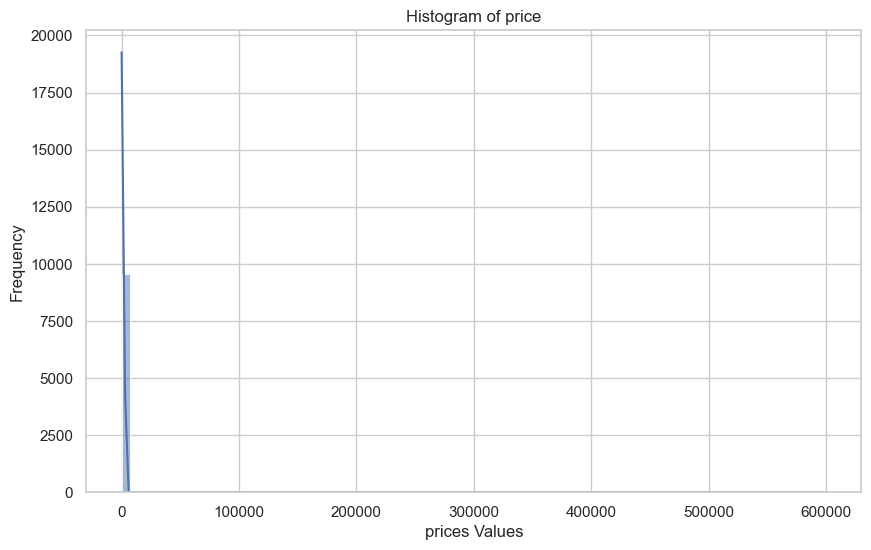

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6)) 
sns.histplot(data=df, x='price', bins=80, kde=True) 
plt.title('Histogram of price')  
plt.xlabel('prices Values') 
plt.ylabel('Frequency')

plt.savefig("../plots/Histogram_of_price.png")
plt.show() 

## Remove Extreme Values

In [12]:
# we only consider bed & bath <= 5
removed_df = df[(df['bed'] <= 5) & (df['bath'] <= 5)]

In [13]:
def remove_outliers(df, cols):

    """
    Remove outliers from a DataFrame based on cols using the IQR method.
    """

    cleaned_df = df.copy() 
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = cleaned_df[(cleaned_df[cols] >= lower_bound) & (cleaned_df[cols] <= upper_bound)]
    
    return cleaned_df

In [14]:
removed_df = remove_outliers(removed_df, 'price')
removed_df.head()

,name,coordinates,price,bed,bath,park_num,postcode,Latitude,Longitude
0,2010/7 Katherine Place Melbourne VIC 3000,"[-37.8201858, 144.9564628]",675.0,2.0,2.0,0,3000,-37.820186,144.956463
1,1308/68 La Trobe Street Melbourne VIC 3000,"[-37.8083648, 144.9667899]",570.0,2.0,1.0,1,3000,-37.808365,144.966790
2,1307/268 Flinders Street Melbourne VIC 3000,"[-37.8178134, 144.9655688]",400.0,1.0,1.0,0,3000,-37.817813,144.965569
3,407/62-68 Hayward Lane Melbourne VIC 3000,"[-37.8089779, 144.9668783]",350.0,0.0,1.0,0,3000,-37.808978,144.966878
4,403/39 Queen Street Melbourne VIC 3000,"[-37.817888, 144.9617372]",450.0,0.0,1.0,0,3000,-37.817888,144.961737


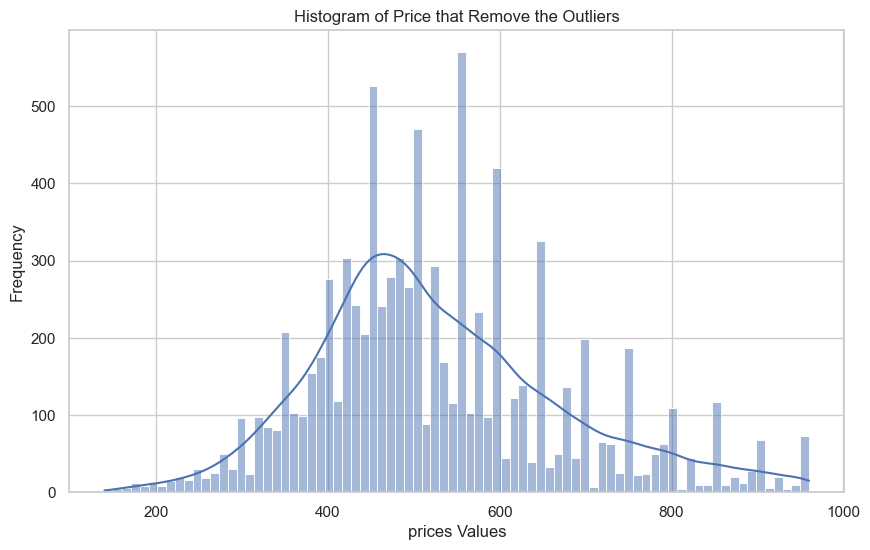

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6)) 
sns.histplot(data=removed_df, x='price', bins=80, kde=True) 
plt.title('Histogram of Price that Remove the Outliers')  
plt.xlabel('prices Values') 
plt.ylabel('Frequency')

plt.savefig("../plots/Histogram_of_Price_Removed_Outliers.png")
plt.show() 

In [16]:
output_path = "../data/raw/domain_outliers_removed.csv"
removed_df.to_csv(output_path, index=False)